In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# Uses the "Supermarket aggr. Customer" dataset

dataset = pd.read_csv('C:\\Users\\mznid\\Downloads\\BigML_Dataset_5e8e7d875e269e3896008816.csv')

In [4]:
dataset = dataset.dropna()

In [5]:
df = dataset.iloc[:,1:40]

#scaler = MinMaxScaler()
scaler = StandardScaler()
X = scaler.fit_transform(df)

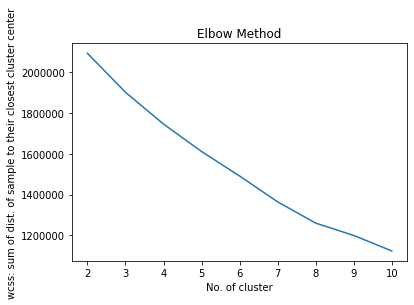

In [6]:
wcss = []

for k in range(2,11):
    kmeans = KMeans(n_clusters = k , init = 'k-means++',)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(2,11), wcss)
plt.title('Elbow Method')
plt.xlabel('No. of cluster')
plt.ylabel('wcss: sum of distance of sample to their closest cluster center' )

In [8]:
kmeans_1 = KMeans(n_clusters=6)
kmeans_1.fit(X)
cluster_pred = kmeans_1.predict(X)
cluster_pred_2 = kmeans_1.labels_
cluster_center = kmeans_1.cluster_centers_

([<matplotlib.axis.XTick at 0x2c78d277908>,
 <a list of 20 Text xticklabel objects>)

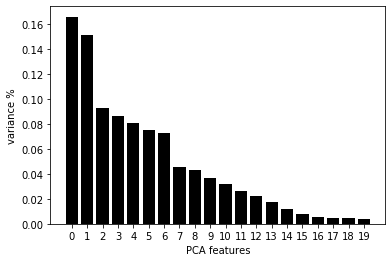

In [9]:
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

Text(0, 0.5, 'PCA 2')

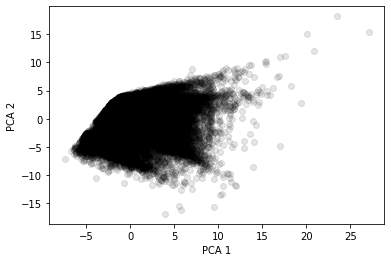

In [10]:
PCA_components = pd.DataFrame(principalComponents)

plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [11]:
pcacenters = pca.transform(cluster_center)

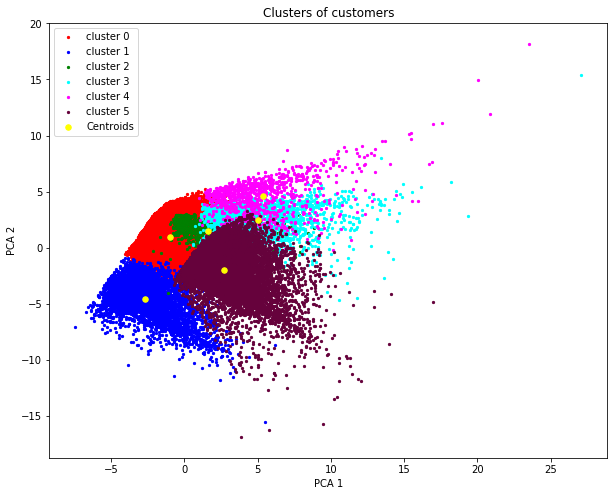

In [12]:
plt.figure(figsize=(10,8))
plt.scatter(PCA_components[0][cluster_pred==0],PCA_components[1][cluster_pred==0], s = 5, c = 'red', label ='cluster 0' )
plt.scatter(PCA_components[0][cluster_pred==1],PCA_components[1][cluster_pred==1], s = 5, c = 'blue', label ='cluster 1' )
plt.scatter(PCA_components[0][cluster_pred==2],PCA_components[1][cluster_pred==2], s = 5, c = 'green', label ='cluster 2' )
plt.scatter(PCA_components[0][cluster_pred==3],PCA_components[1][cluster_pred==3], s = 5, c = 'cyan', label = 'cluster 3')
plt.scatter(PCA_components[0][cluster_pred==4],PCA_components[1][cluster_pred==4], s = 5, c = 'magenta', label = 'cluster 4')
plt.scatter(PCA_components[0][cluster_pred==5],PCA_components[1][cluster_pred==5], s = 5, c = '#66023C', label = 'cluster 5')

# plt.scatter(cluster_center[:,0],cluster_center[:,1], s = 30, c = 'yellow', label = 'Centroids')     THIS DOESN'T WORK WITH PCA
plt.scatter(pcacenters[:,0],pcacenters[:,1], s = 30, c = 'yellow', label = 'Centroids')   

plt.title('Clusters of customers')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

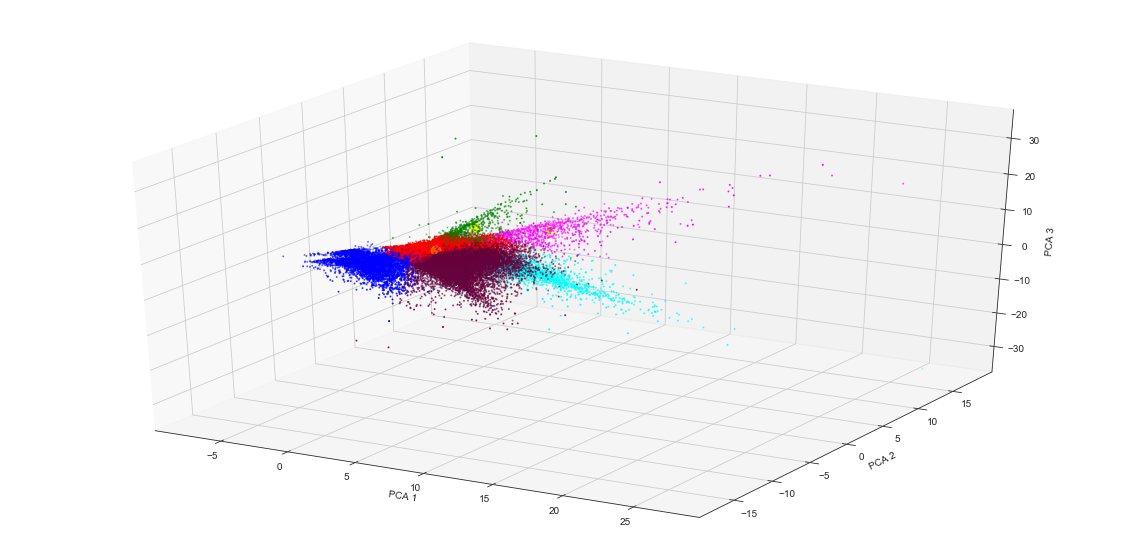

In [20]:
sns.set_style("white")
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(PCA_components[0][cluster_pred==0],PCA_components[1][cluster_pred==0], PCA_components[2][cluster_pred==0], s = 1, c = 'red', label ='cluster 1' )
ax.scatter(PCA_components[0][cluster_pred==1],PCA_components[1][cluster_pred==1], PCA_components[2][cluster_pred==1], s = 1, c = 'blue', label ='cluster 2' )
ax.scatter(PCA_components[0][cluster_pred==2],PCA_components[1][cluster_pred==2], PCA_components[2][cluster_pred==2], s = 1, c = 'green', label ='cluster 3' )
ax.scatter(PCA_components[0][cluster_pred==3],PCA_components[1][cluster_pred==3], PCA_components[2][cluster_pred==3], s = 1, c = 'cyan', label = 'cluster 4')
ax.scatter(PCA_components[0][cluster_pred==4],PCA_components[1][cluster_pred==4], PCA_components[2][cluster_pred==4], s = 1, c = 'magenta', label = 'cluster 5')
ax.scatter(PCA_components[0][cluster_pred==5],PCA_components[1][cluster_pred==5], PCA_components[2][cluster_pred==5], s = 1, c = '#66023C', label = 'cluster 6')
ax.scatter(pcacenters[:,0],pcacenters[:,1],pcacenters[:,2], s = 100, c = 'yellow', label = 'Centroids')

ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel('PCA 3')
plt.show()

Text(412.0, 0.5, 'Feature')

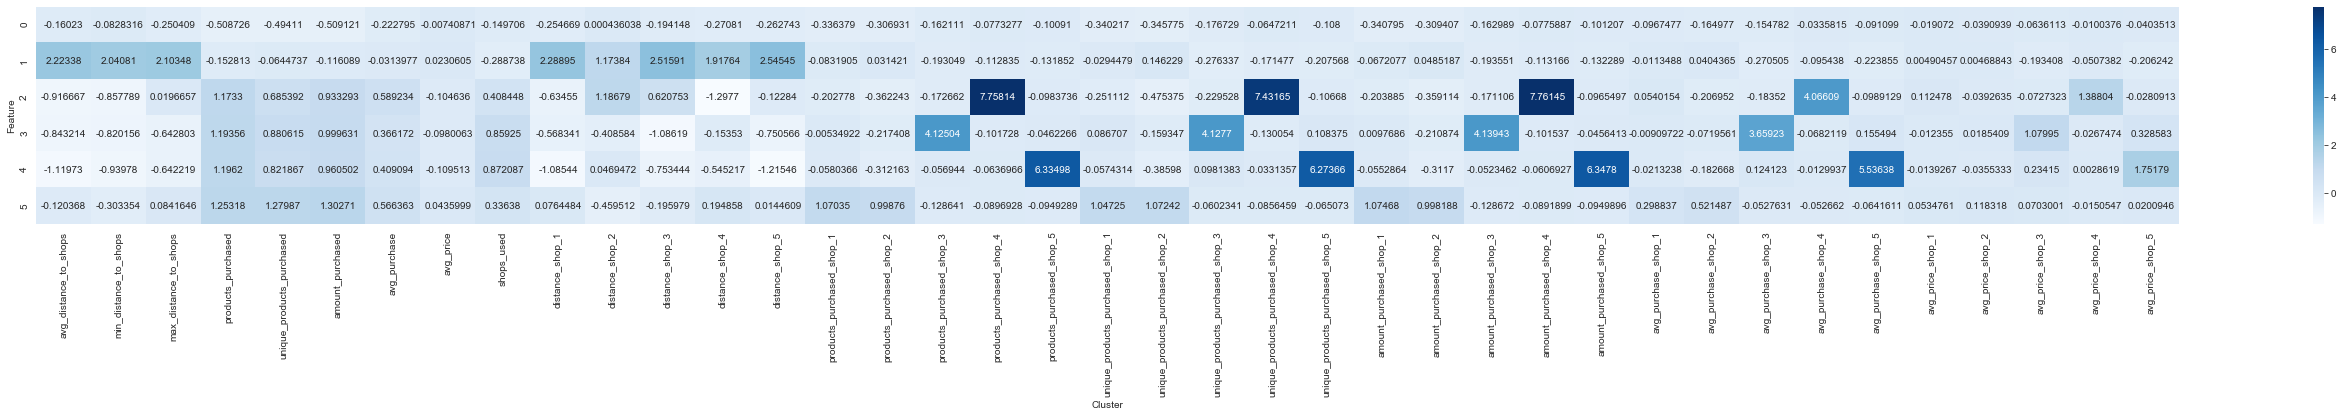

In [16]:
cluster0 = X[cluster_pred==0]
cluster1 = X[cluster_pred==1]
cluster2 = X[cluster_pred==2]
cluster3 = X[cluster_pred==3]
cluster4 = X[cluster_pred==4]
cluster5 = X[cluster_pred==5]

clusterlist = [cluster0,cluster1,cluster2,cluster3,cluster4,cluster5]

clusterlengths = []
for each in clusterlist:
    clusterlengths.append(len(each))

clustermeans = []
for each in clusterlist:
    clustermeans.append(np.mean(each, axis = 0))

sidebyside = pd.DataFrame(columns = df.columns)
for each in clustermeans:
    sidebyside = sidebyside.append(pd.Series(each,index = df.columns), ignore_index = True)   # I don't know why we have to go index-to-columns... seems counterintuitive?

fig, ax = plt.subplots(figsize=(48,4)) 
sns.heatmap(sidebyside, annot = True, cmap = "Blues", fmt='g', ax=ax)
plt.xlabel('Cluster')
plt.ylabel('Feature')